In [1]:
import pandas as pd

def total_layers(path):
    df = pd.read_csv(path)

    # Calculate the sum of the 'Active layers' column
    active_layers_sum = df['Active layers'][:156].sum()
    return active_layers_sum
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp21_CIFAR10_16_layer/summary.csv', '16 block baseline'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_0_16_layer/summary.csv', "validation set accuracy"),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_4_16_layer/summary.csv', 'p1 norm of weights'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_3_16_layer/summary.csv', 'p2 norm of weights'),
]
for p,n in paths:
    print(n)
    l = total_layers(p)
    h = 32
    w = 32
    num_classes = 10
    # Calculate the expression
    result = 19584 * h * w + l * (h * w / 16) * (16.5 * 192**2 + 77.125 * 192) + 2 * 384 * num_classes
    result_scientific_notation = "{:.2e}".format(result)
    print(result_scientific_notation)

16 block baseline
9.96e+10
validation set accuracy
2.85e+10
p1 norm of weights
6.90e+10
p2 norm of weights
3.78e+10


In [2]:
import torch

In [3]:
import numpy as np

In [12]:
x = torch.tensor(np.ones((10, 1)))
o = torch.cat((x,-x),-1)
o

tensor([[ 1., -1.],
        [ 1., -1.],
        [ 1., -1.],
        [ 1., -1.],
        [ 1., -1.],
        [ 1., -1.],
        [ 1., -1.],
        [ 1., -1.],
        [ 1., -1.],
        [ 1., -1.]], dtype=torch.float64)

In [13]:
import torch.nn.functional as F

In [14]:
F.relu(o)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=torch.float64)

In [2]:
import pandas as pd

def total_layers(path):
    df = pd.read_csv(path)

    # Calculate the sum of the 'Active layers' column
    active_layers_sum = df['Active layers'][:113].sum()
    return active_layers_sum
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp21_CIFAR10_16_layer/summary.csv', '16 block baseline'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_0_16_layer/summary.csv', "validation set accuracy"),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_4_16_layer/summary.csv', 'p1 norm of weights'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_3_16_layer/summary.csv', 'p2 norm of weights'),
]
for p,n in paths:
    print(n)
    l = total_layers(p)
    h = 32
    w = 32
    num_classes = 10
    # Calculate the expression
    result = 19584 * h * w + l * (h * w / 16) * (16.5 * 192**2 + 77.125 * 192) + 2 * 384 * num_classes
    result_scientific_notation = "{:.2e}".format(result)
    print(result_scientific_notation)

16 block baseline
7.21e+10
validation set accuracy
1.16e+10
p1 norm of weights
4.15e+10
p2 norm of weights
2.41e+10


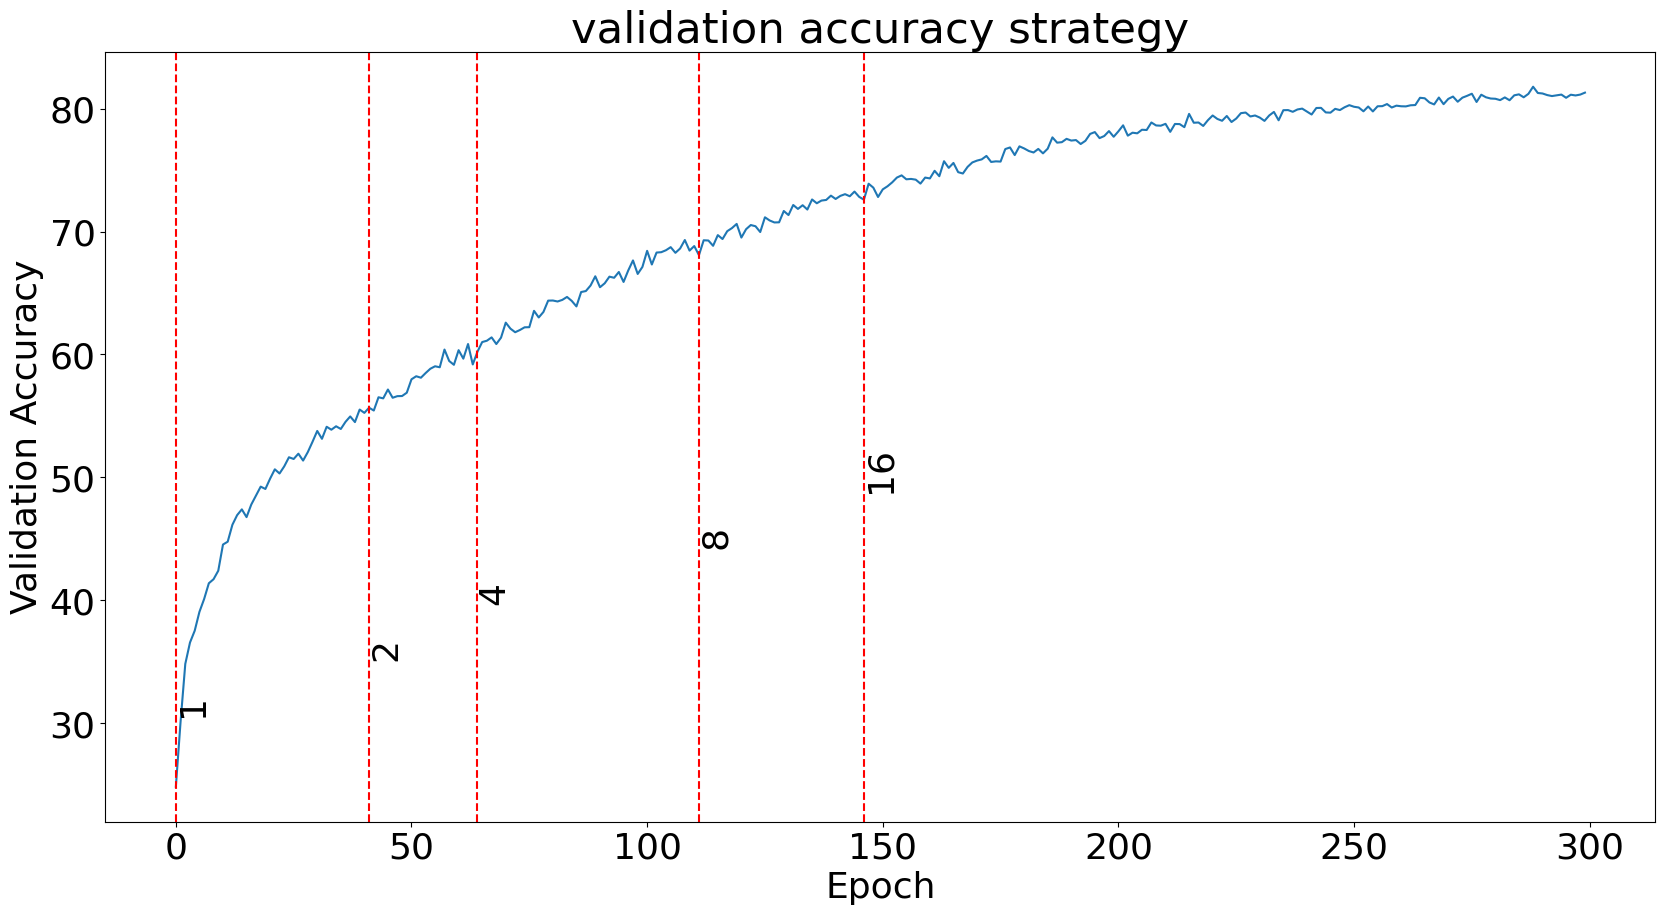

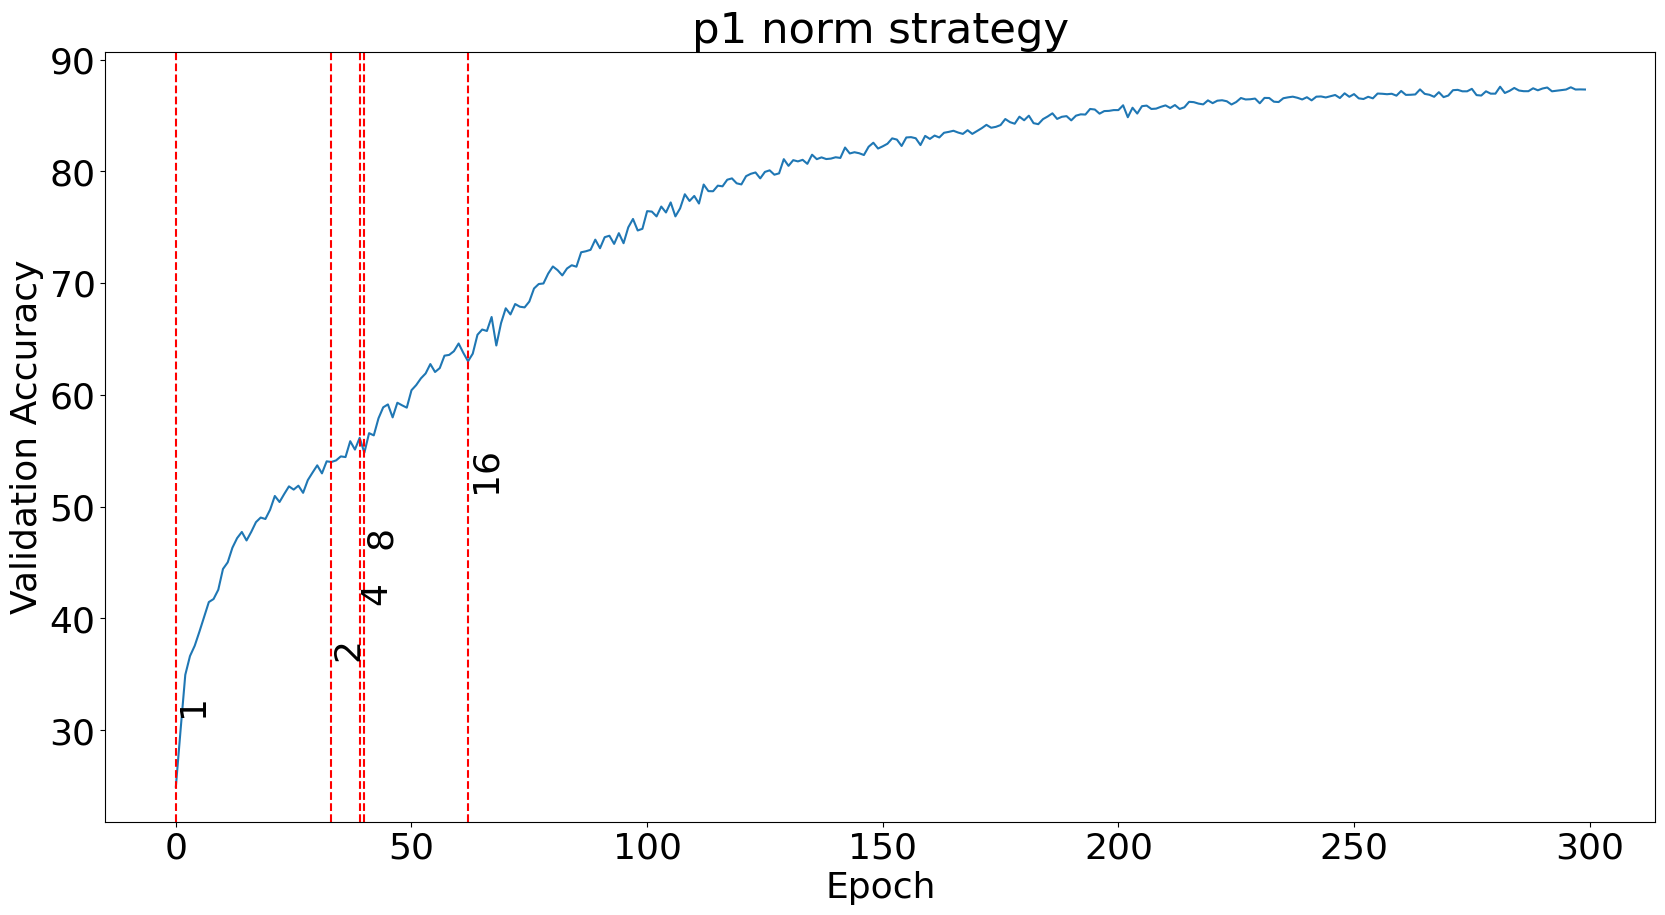

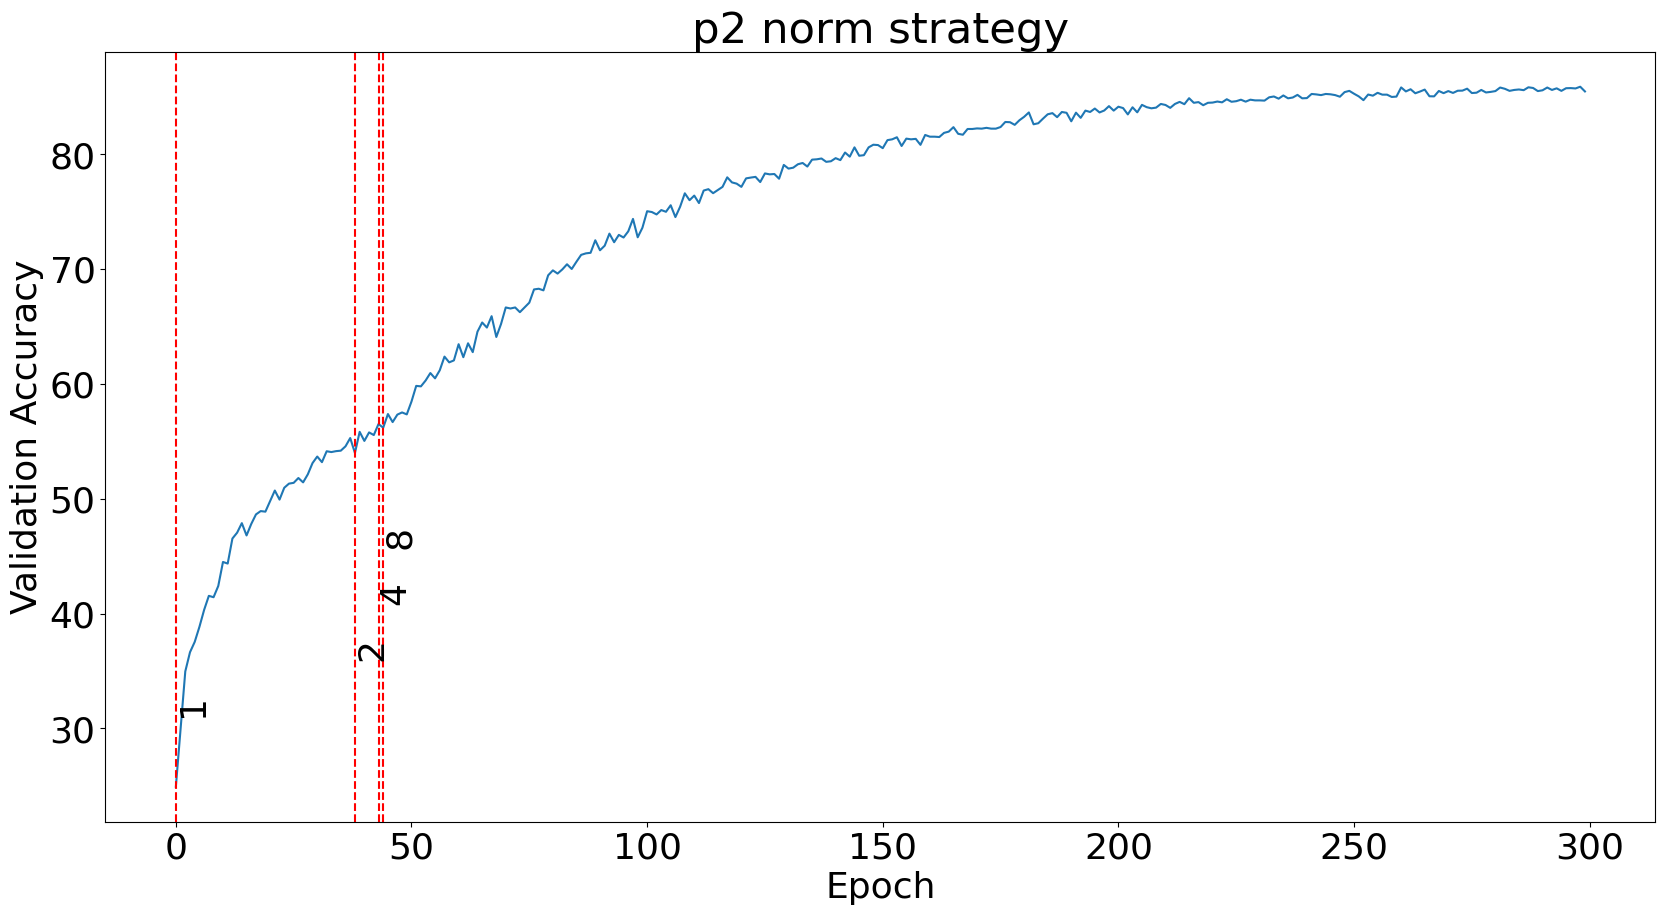

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# Look at the initializations, important for generalization
# K block to be used from scratch ~ default initialization
# Next blocks to be added, we can update initialization
# Max diff in each layer
# Calculate the difference in computations
# For the first block, use default initialization, for the second block ~ default or smth else, third block onwards, copy the weights of the previous layer
# Potentially add gaussian noise with a small variance, smaller than the average absolute value of the weight, the mean is 0
# Have a better initialization than random initialization
#
plt.rcParams.update({'font.size': 26})
paths = [
    # ('/home/sharipov/monet/output/train/Upd_Exp1_CIFAR10_dynamic_16_layer/summary.csv', 'Original basic strategy'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_0_16_layer/summary.csv', "validation accuracy strategy"),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_4_16_layer/summary.csv', 'p1 norm strategy'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_3_16_layer/summary.csv', 'p2 norm strategy'),
    # ('/home/sharipov/monet/output/train/Upd_Exp18_CIFAR10_dynamic_strat_2_16_layer/summary.csv', 'Smooth top 1 accuracy'),
    # ('/home/sharipov/monet/output/train/Upd_Exp1_CIFAR10_dynamic_strat_1_16_layer/summary.csv', 'Exponential drop')
]

def plot_growing_network(path, dest, name):
    # Load your CSV data into a DataFrame
    df = pd.read_csv(path)

    # Plot "eval_top1" against "epoch"
    plt.figure(figsize=(20, 10))
    plt.plot(df['epoch'], df['eval_top1'], label=name)

    # Detect points where the number of active layers changes
    layer_changes = df[df['Active layers'].diff() != 0]

    # Determine dynamic heights for annotations to avoid overlap
    # Set a base height and increment to distribute annotations vertically
    base_height = min(df['eval_top1']) + (max(df['eval_top1']) - min(df['eval_top1'])) * 0.1
    height_increment = (max(df['eval_top1']) - min(df['eval_top1'])) * 0.08
    current_height = base_height

    for index, row in layer_changes.iterrows():
        plt.axvline(x=row['epoch'], color='r', linestyle='--')
        plt.text(row['epoch'], current_height, f'{int(row["Active layers"])}', rotation=90, va='bottom')
        # Update the height for the next annotation to avoid overlap
        current_height += height_increment
        if current_height > max(df['eval_top1']) - height_increment:
            current_height = base_height  # Reset to base if exceeding plot range

    # Add some plot decorations
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(name)
    plt.savefig(f'{dest}/{name}.png', dpi=300, bbox_inches='tight')
    plt.show()

for p, n in paths:
    plot_growing_network(p,'/home/sharipov/monet/output/figures', n)

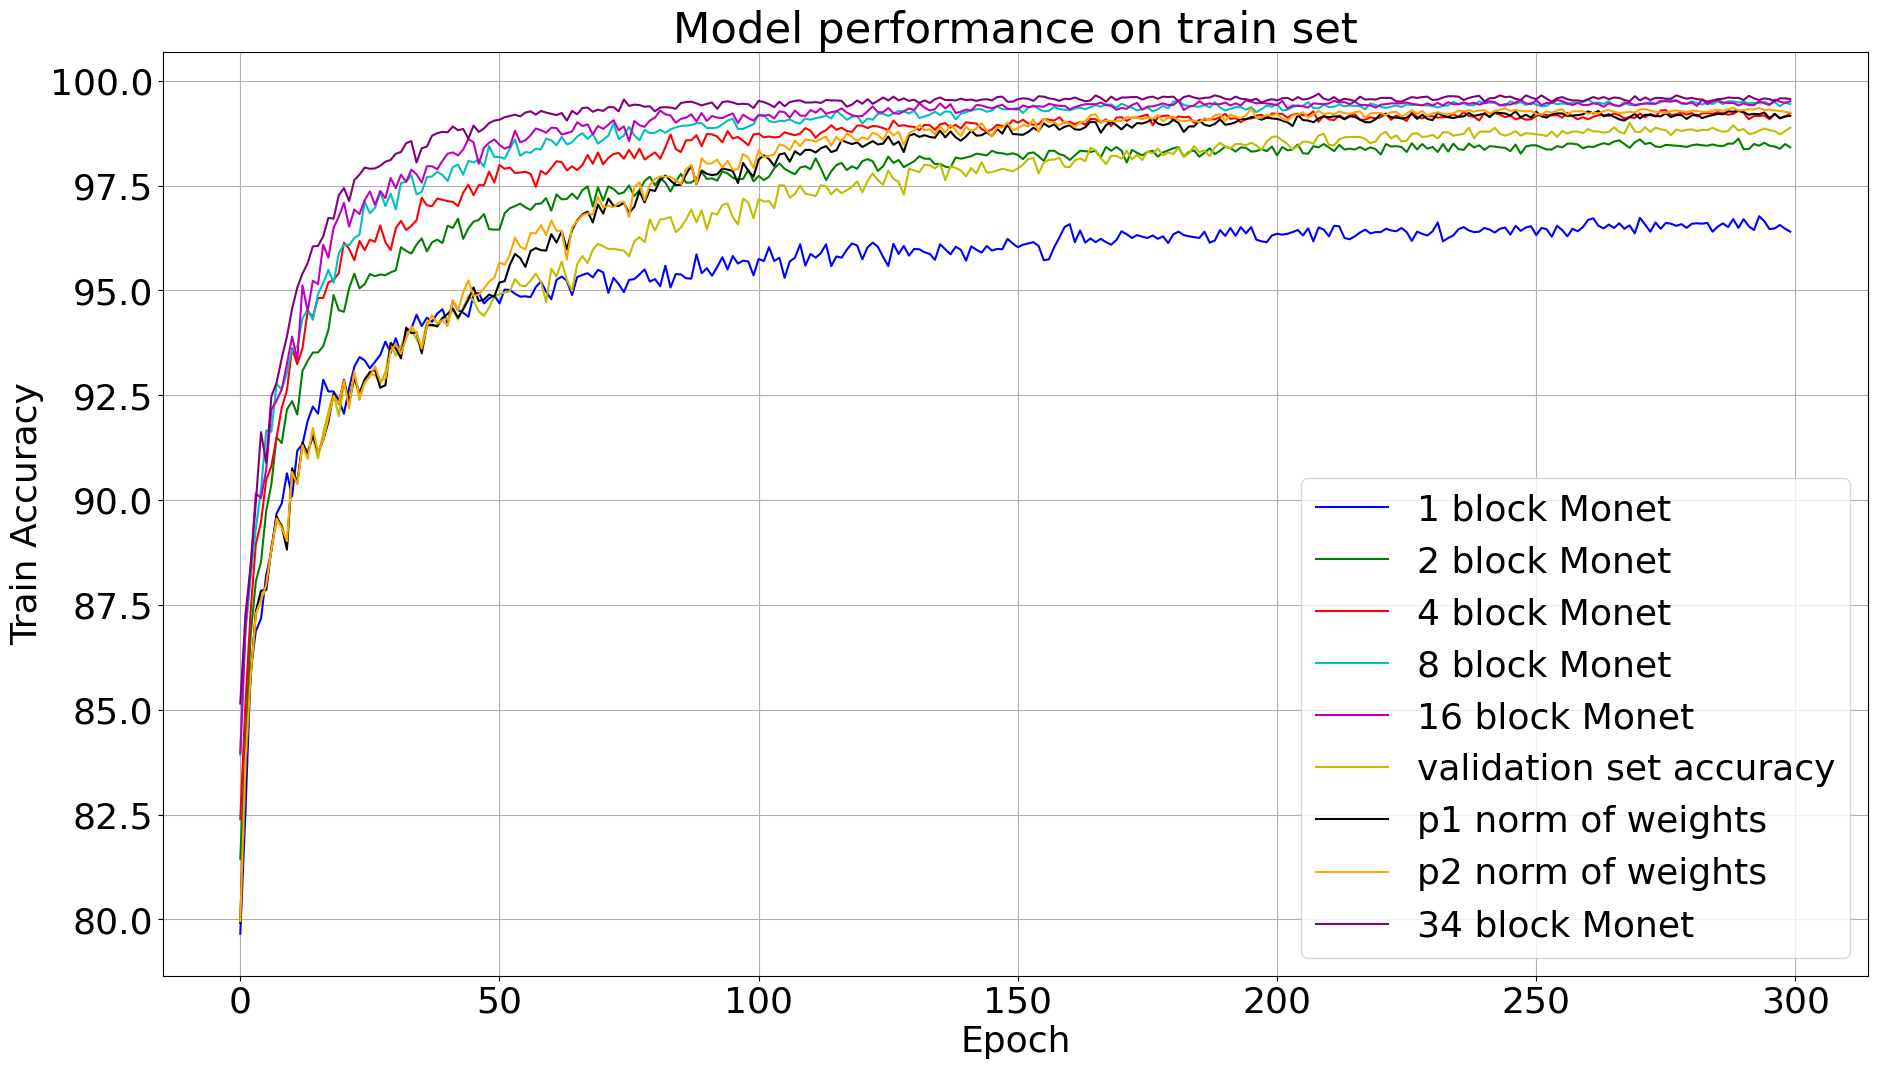

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

def plot_metrics(paths, dest):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(22, 12))
    
    # Define a list of colors and markers for different plots
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
    
    # Use itertools.cycle to cycle through colors and markers if there are more plots than available colors/markers
    color_cycle = itertools.cycle(colors)
    
    # Loop through each path and name, plotting the train accuracy on the same canvas
    for path, name in paths:
        # Load the CSV file into a DataFrame
        data = pd.read_csv(path)
        # Plot training accuracy
        ax.plot(data['epoch'], data['eval_top5'], label=name, color=next(color_cycle),)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Train Accuracy')
    ax.legend(loc='lower right')
    ax.grid(True)
    
    plt.title('Model performance on train set')
    plt.savefig(f'{dest}/train_accuracy_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# List of paths and names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_1_layer/summary.csv', '1 block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp5_CIFAR10_2_layer/summary.csv', '2 block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp4_CIFAR10_4_layer/summary.csv', '4 block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_8_layer/summary.csv', '8 block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_16_layer/summary.csv', '16 block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_0_16_layer/summary.csv', 'validation set accuracy'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_3_16_layer/summary.csv', 'p1 norm of weights'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_4_16_layer/summary.csv', 'p2 norm of weights'),
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_no_multi_no_conv/summary.csv', '34 block Monet')
]

# Call the function with the list of paths and destination directory
plot_metrics(paths, '/home/sharipov/monet/output/figures')


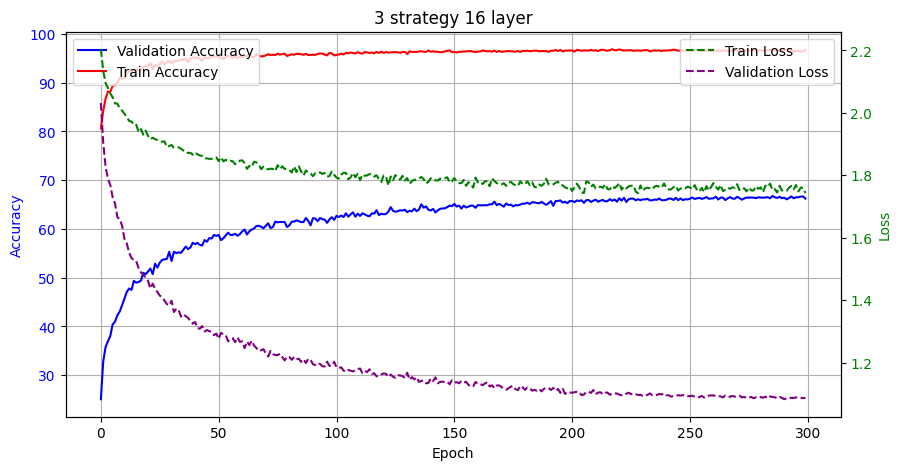

In [3]:
paths = [('/home/sharipov/monet/output/train/Upd_Exp17_CIFAR10_dynamic_strat_3_16_layer/summary.csv', '3 strategy 16 layer')]
for p, n in paths:
    plot_metrics(p, '/home/sharipov/monet/output/figures', n)

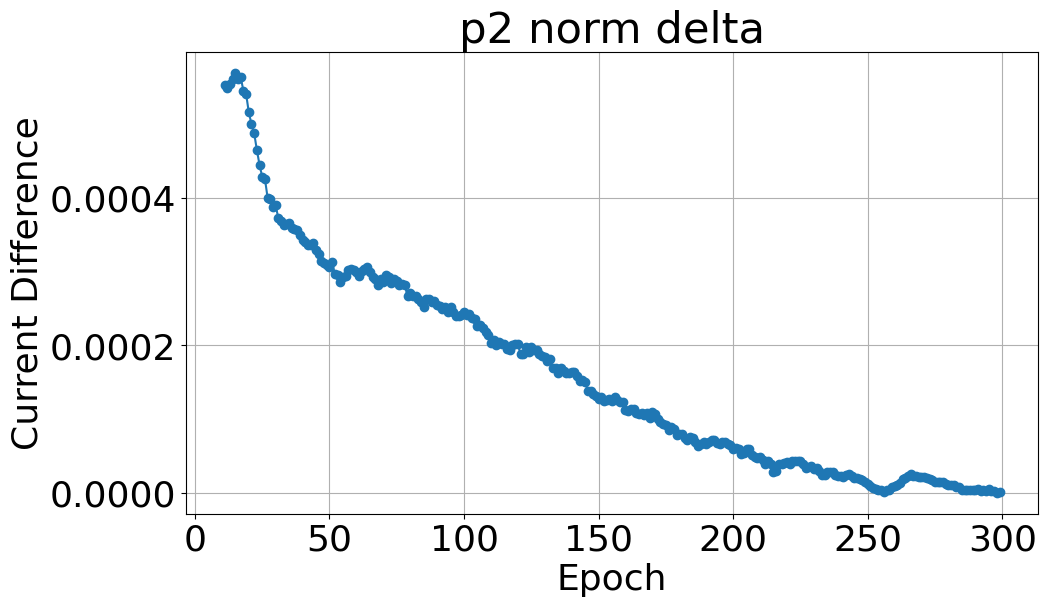

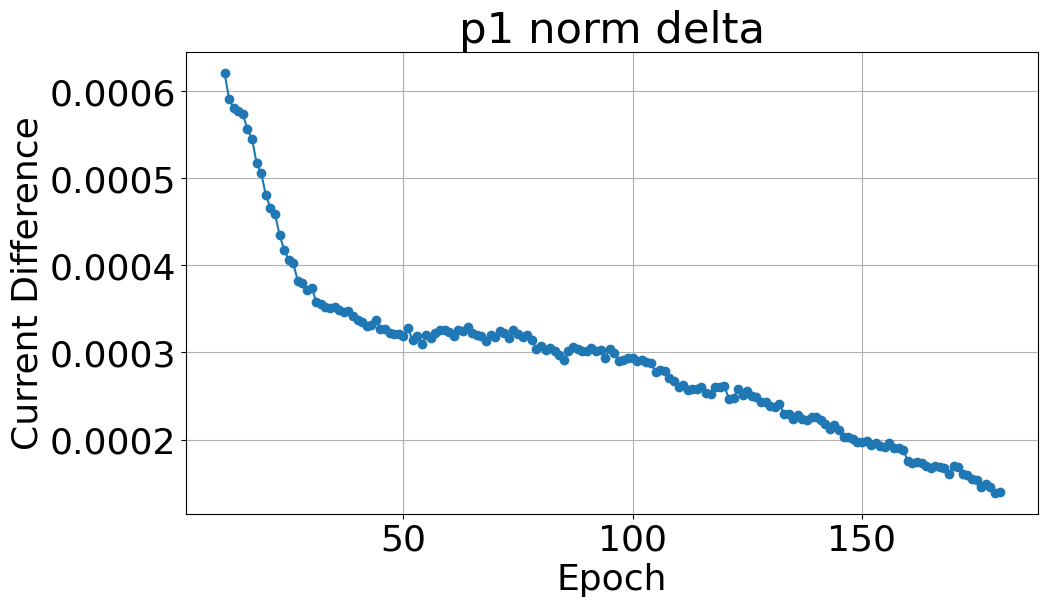

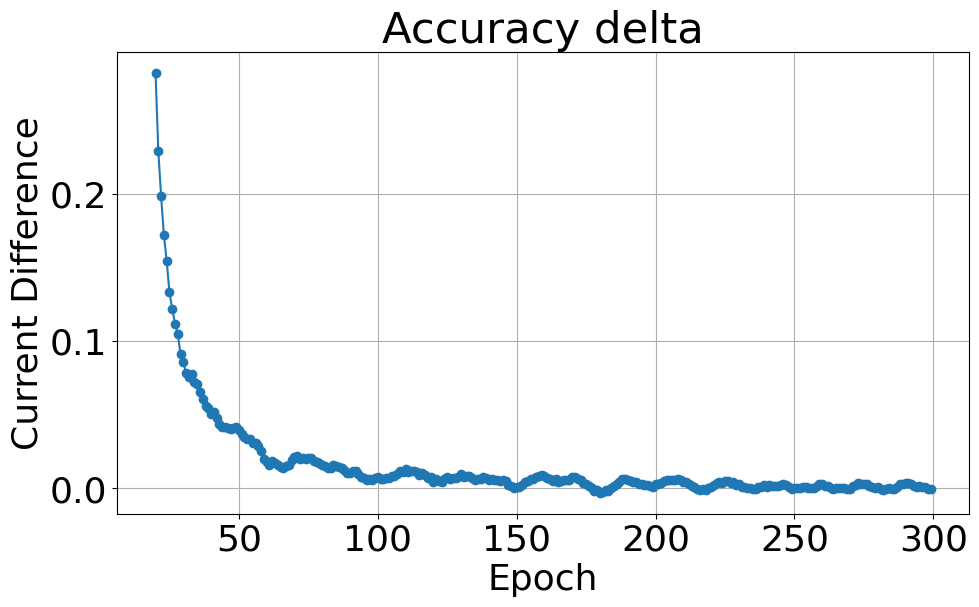

In [38]:
import matplotlib.pyplot as plt
paths = [
    ('/home/sharipov/monet/output/text/output_2032380.txt', 'p2 norm delta'),
    ('/home/sharipov/monet/output/text/output_2032744.txt', 'p1 norm delta'),
    ('/home/sharipov/monet/output/text/output_2032367.txt', 'Accuracy delta')
]

def plot_delta(file_path, dest, name):
    # Path to the file - update this to the path of your actual file
    epoch_diff = []

    # Open and read the file
    with open(file_path, 'r') as file:
        current_epoch = None
        for line in file:
            if 'Epoch' in line and ';' in line:
                current_epoch = int(line.split(';')[0].split()[1])  # Extract epoch number
            if 'Current difference' in line:
                current_diff = float(line.split(',')[0].split(':')[1].strip())  # Extract current difference
                epoch_diff.append((current_epoch, current_diff))  # Append the tuple to the list

    # Unzip the list of tuples into two lists
    epochs, diffs = zip(*epoch_diff) if epoch_diff else ([], [])

    # Plotting
    plt.figure(figsize=(11, 6))
    plt.plot(epochs, diffs, marker='o', linestyle='-')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.ylabel('Current Difference')
    plt.grid(True)
    plt.savefig(f'{dest}/{name}.png', dpi=300, bbox_inches='tight')
    plt.show()

for p, n in paths:
    plot_delta(p, '/home/sharipov/monet/output/figures', n)
    # Put threshold around epoch 30 for p1 norm


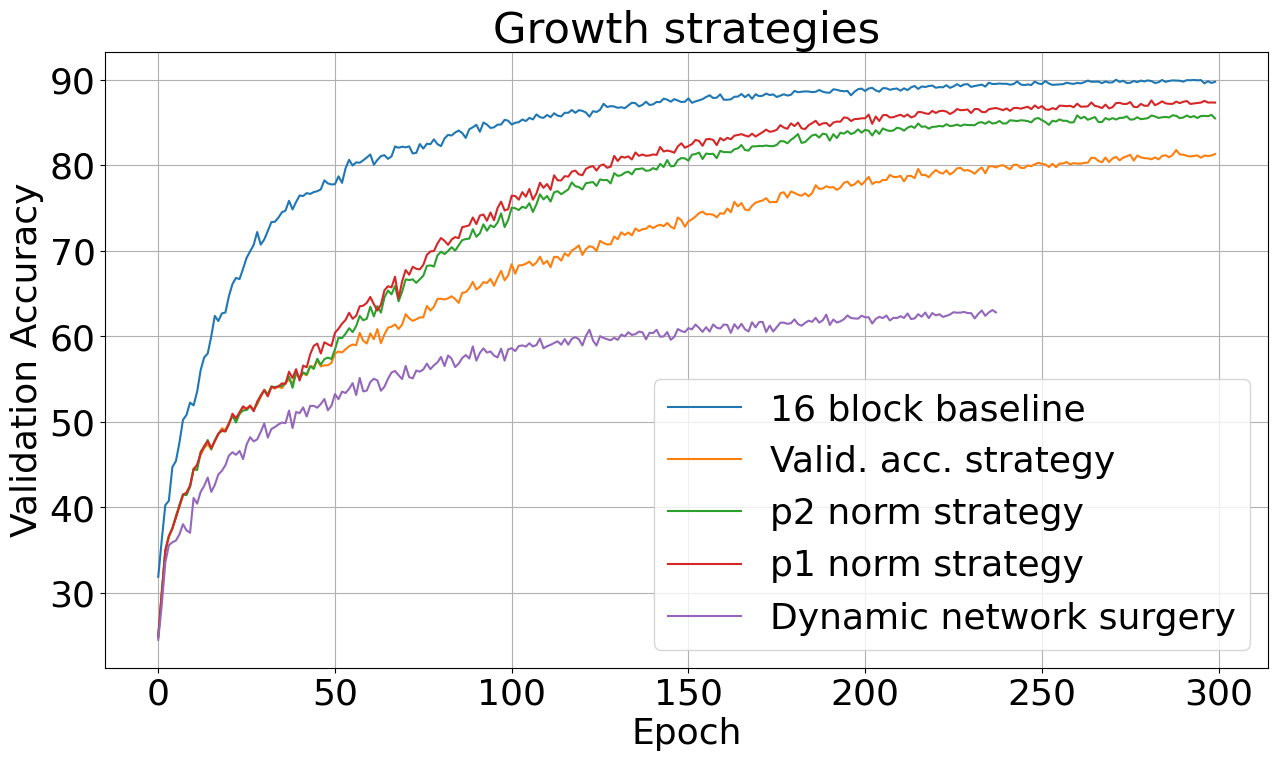

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_metrics(paths, dest, fig_name, title='Growth strategies'):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Loop through each path and name, load data, and plot it
    for path, name in paths:
        data = pd.read_csv(path)
        ax.plot(data['epoch'], data['eval_top1'], label=name)
    
    # Configure axis labels, legend, and grid
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Accuracy')
    ax.legend(loc='lower right')
    ax.grid(True)
    
    # Set plot title and save the figure to disk
    plt.title(title)
    plt.savefig(f'{dest}/{fig_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp21_CIFAR10_16_layer/summary.csv', '16 block baseline'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_0_16_layer/summary.csv', 'Valid. acc. strategy'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_3_16_layer/summary.csv', 'p2 norm strategy'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_dynamic_strat_4_16_layer/summary.csv', 'p1 norm strategy'),
    ('/home/sharipov/monet/output/train/Upd_Exp21_CIFAR10_prune_16_layer/summary.csv', 'Dynamic network surgery')
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'Validation_Accuracy_Comparison')


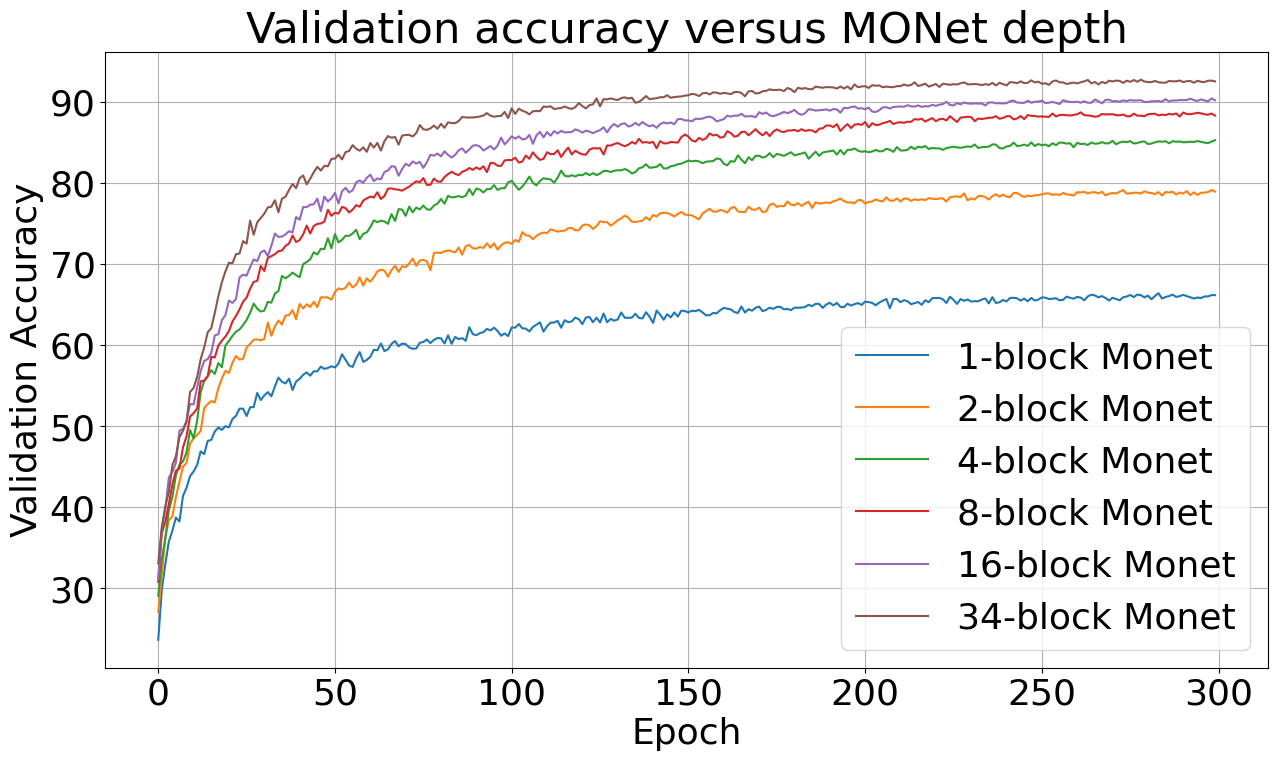

In [23]:
# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_1_layer/summary.csv', '1-block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp5_CIFAR10_2_layer/summary.csv', '2-block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp4_CIFAR10_4_layer/summary.csv', '4-block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_8_layer/summary.csv', '8-block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp22_CIFAR10_16_layer/summary.csv', '16-block Monet'),
    ('/home/sharipov/monet/output/train/Upd_Exp6_CIFAR10_no_multi_no_conv/summary.csv', '34-block Monet')
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'blocks_1_through_34', 'Validation accuracy versus MONet depth')

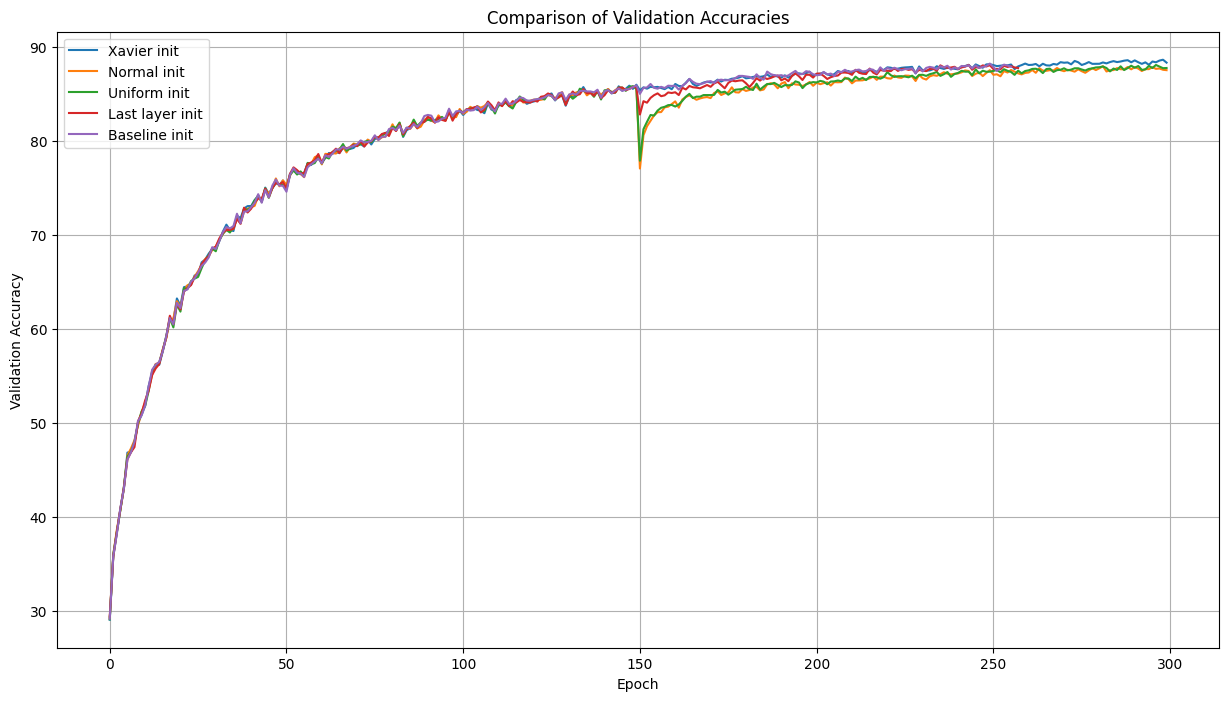

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_metrics(paths, dest, fig_name):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Loop through each path and name, load data, and plot it
    for path, name in paths:
        data = pd.read_csv(path)
        ax.plot(data['epoch'], data['eval_top1'], label=name)
    
    # Configure axis labels, legend, and grid
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Accuracy')
    ax.legend(loc='upper left')
    ax.grid(True)
    
    # Set plot title and save the figure to disk
    plt.title('Comparison of Validation Accuracies')
    plt.savefig(f'{dest}/{fig_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp33_CIFAR10_monet_double_init_0/summary.csv', 'Xavier init'),
    ('/home/sharipov/monet/output/train/Upd_Exp33_CIFAR10_monet_double_init_1/summary.csv', 'Normal init'),
    ('/home/sharipov/monet/output/train/Upd_Exp33_CIFAR10_monet_double_init_2/summary.csv', 'Uniform init'),
    ('/home/sharipov/monet/output/train/Upd_Exp33_CIFAR10_monet_double_init_3/summary.csv', 'Last layer init'),
    # ('/home/sharipov/monet/output/train/Upd_Exp33_CIFAR10_monet_double_init_4/summary.csv', 'Baseline init'),
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'Validation_Accuracy_Comparison')


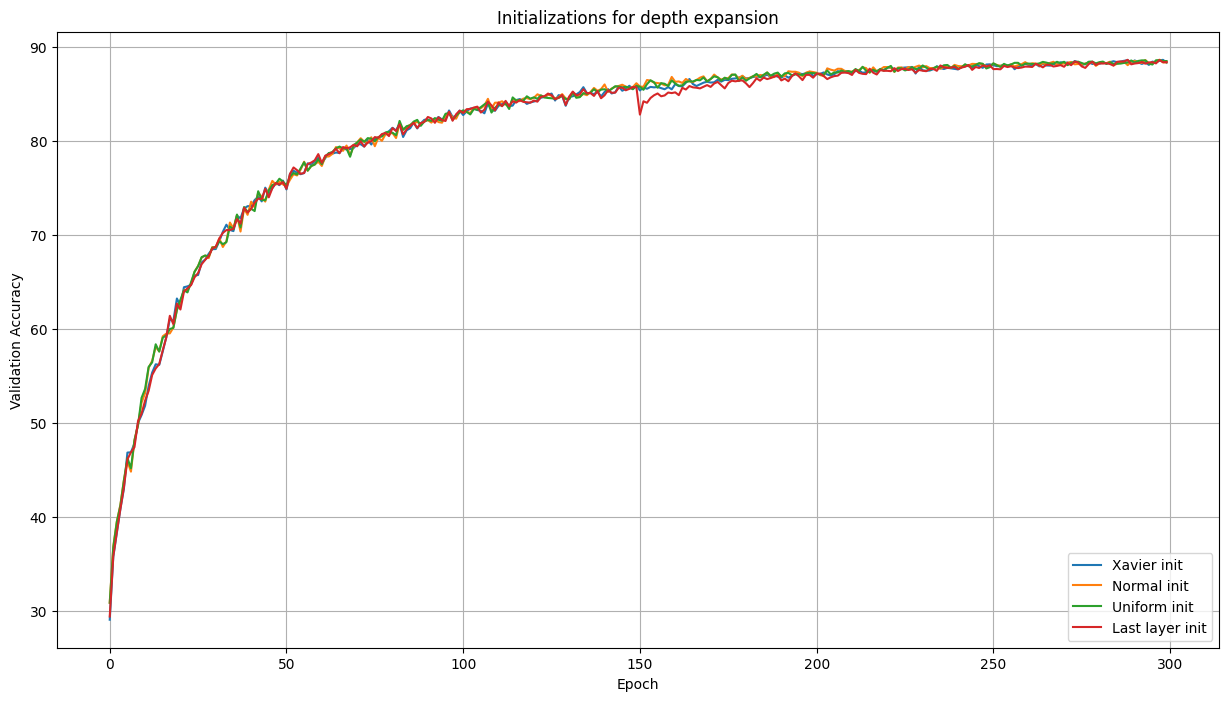

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_metrics(paths, dest, fig_name, title, start=0):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Loop through each path and name, load data, and plot it
    for path, name in paths:
        data = pd.read_csv(path)
        data = data[data['epoch'] >= start]
        ax.plot(data['epoch'], data['eval_top1'], label=name)
    
    # Configure axis labels, legend, and grid
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Accuracy')
    ax.legend(loc='lower right')
    ax.grid(True)
    
    # Set plot title and save the figure to disk
    plt.title(title)
    plt.savefig(f'{dest}/{fig_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp33_CIFAR10_monet_double_init_0/summary.csv', 'Xavier init'),
    ('/home/sharipov/monet/output/train/Upd_Exp37_CIFAR10_monet_16_depth_init_1/summary.csv', 'Normal init'),
    ('/home/sharipov/monet/output/train/Upd_Exp37_CIFAR10_monet_16_depth_init_2/summary.csv', 'Uniform init'),
    ('/home/sharipov/monet/output/train/Upd_Exp33_CIFAR10_monet_double_init_3/summary.csv', 'Last layer init'),
    # ('/home/sharipov/monet/output/train/Upd_Exp33_CIFAR10_monet_double_init_4/summary.csv', 'Baseline init'),
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'Validation_Accuracy_Comparison', 'Initializations for depth expansion', 0)

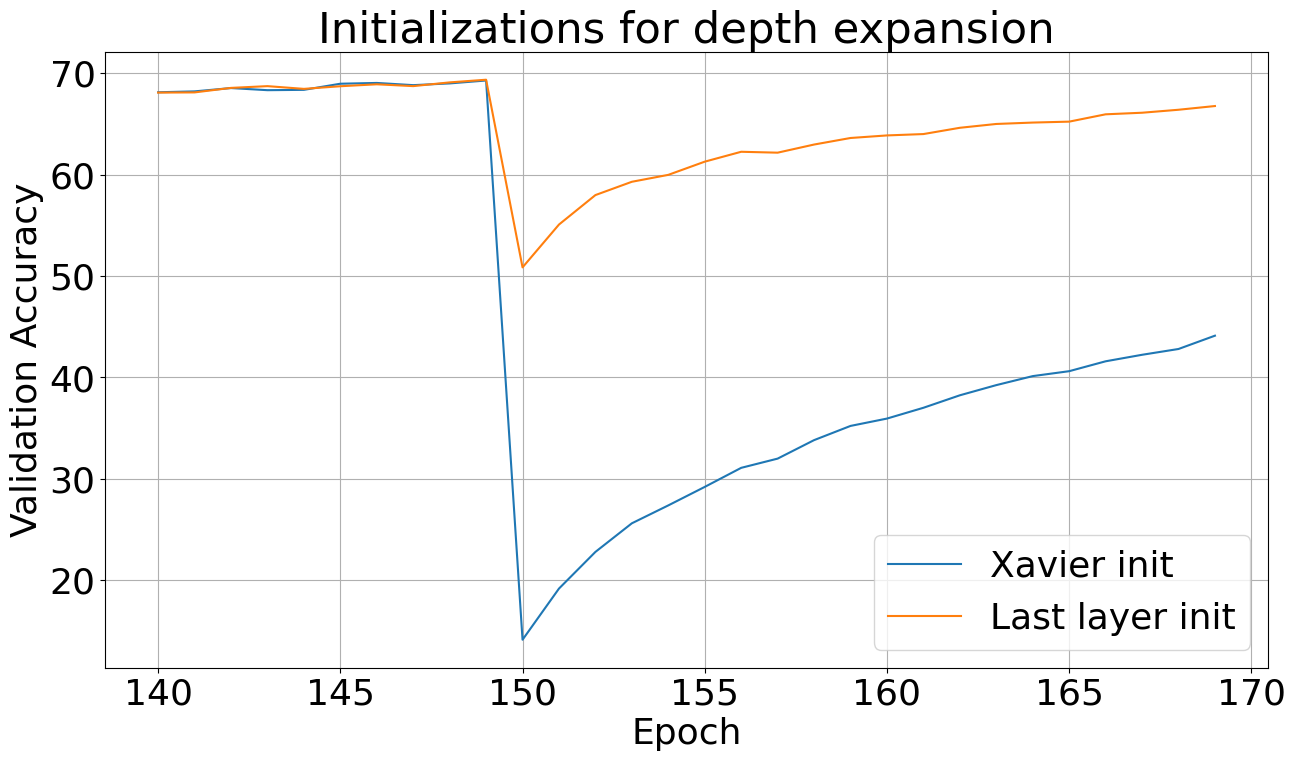

In [15]:
# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp57_imagenet_monet_16_double_depth_init_0/summary.csv', 'Xavier init'),
    # ('/home/sharipov/monet/output/train/Upd_Exp57_imagenet_monet_16_double_depth_init_1/summary.csv', 'Normal init'),
    # ('/home/sharipov/monet/output/train/Upd_Exp37_CIFAR10_monet_16_depth_init_2/summary.csv', 'Uniform init'),
    ('/home/sharipov/monet/output/train/Upd_Exp57_imagenet_monet_16_double_depth_init_3/summary.csv', 'Last layer init'),
    # ('/home/sharipov/monet/output/train/Upd_Exp33_CIFAR10_monet_double_init_4/summary.csv', 'Baseline init'),
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'Validation_Accuracy_Comparison', 'Initializations for depth expansion', 140)

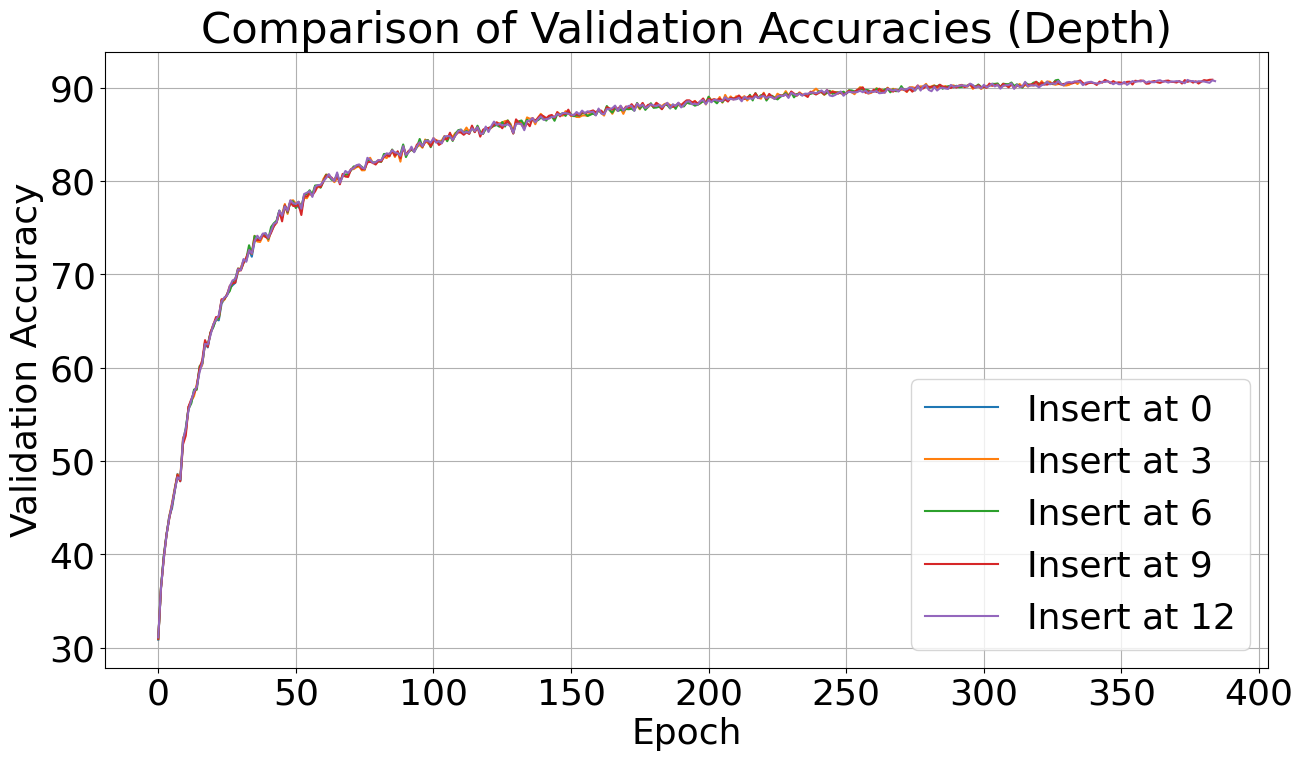

In [8]:
# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_0_residual/summary.csv', 'Insert at 0'),
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_3_residual/summary.csv', 'Insert at 3'),
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_6_residual/summary.csv', 'Insert at 6'),
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_9_residual/summary.csv', 'Insert at 9'),
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_12_residual/summary.csv', 'Insert at 12'),



]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'inserts', 'Comparison of Validation Accuracies (Depth)', 0)

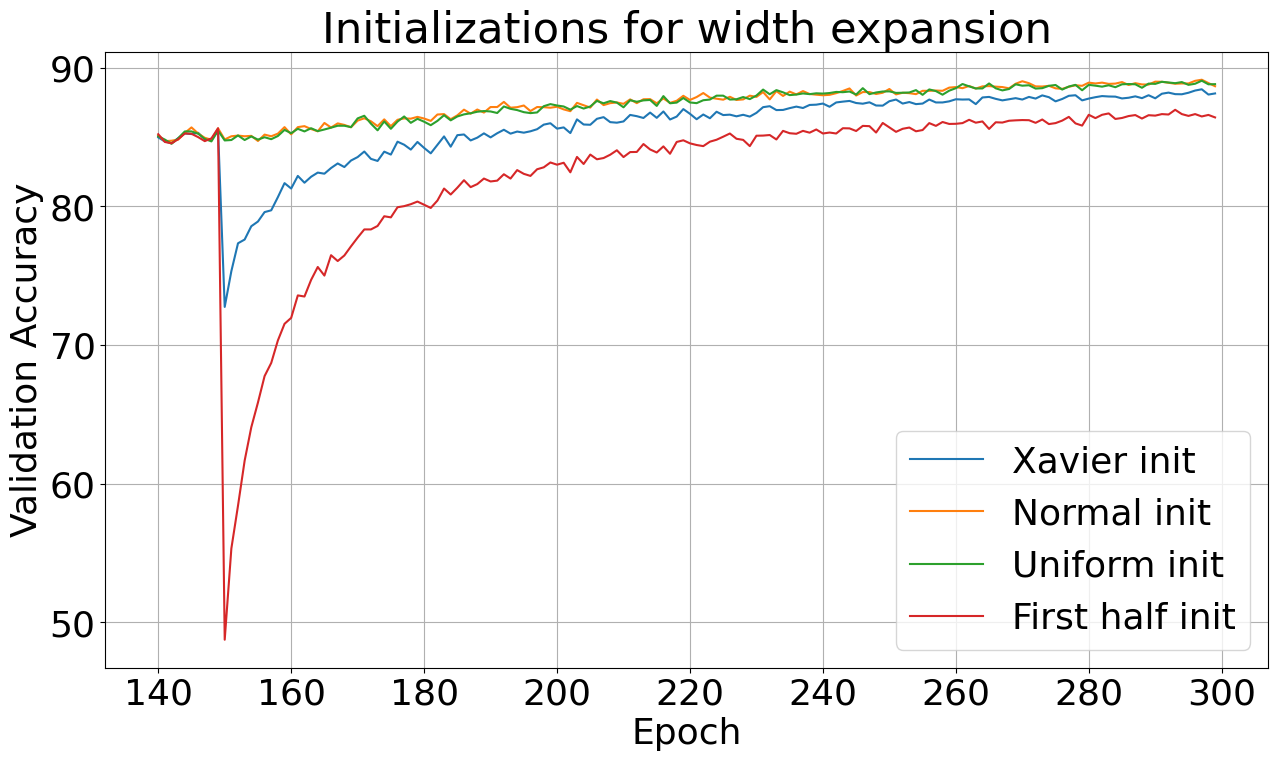

In [9]:
# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp39_CIFAR10_monet_16_double_width_init_0/summary.csv', 'Xavier init'),
    ('/home/sharipov/monet/output/train/Upd_Exp39_CIFAR10_monet_16_double_width_init_1/summary.csv', 'Normal init'),
    ('/home/sharipov/monet/output/train/Upd_Exp39_CIFAR10_monet_16_double_width_init_2/summary.csv', 'Uniform init'),
    ('/home/sharipov/monet/output/train/Upd_Exp39_CIFAR10_monet_16_double_width_init_3/summary.csv', 'First half init'),
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'Validation_Accuracy_Comparison', 'Initializations for width expansion', 140)

Xavier init 88.48
16
set()
Normal init 88.78
Uniform init 88.57
First half init 88.32


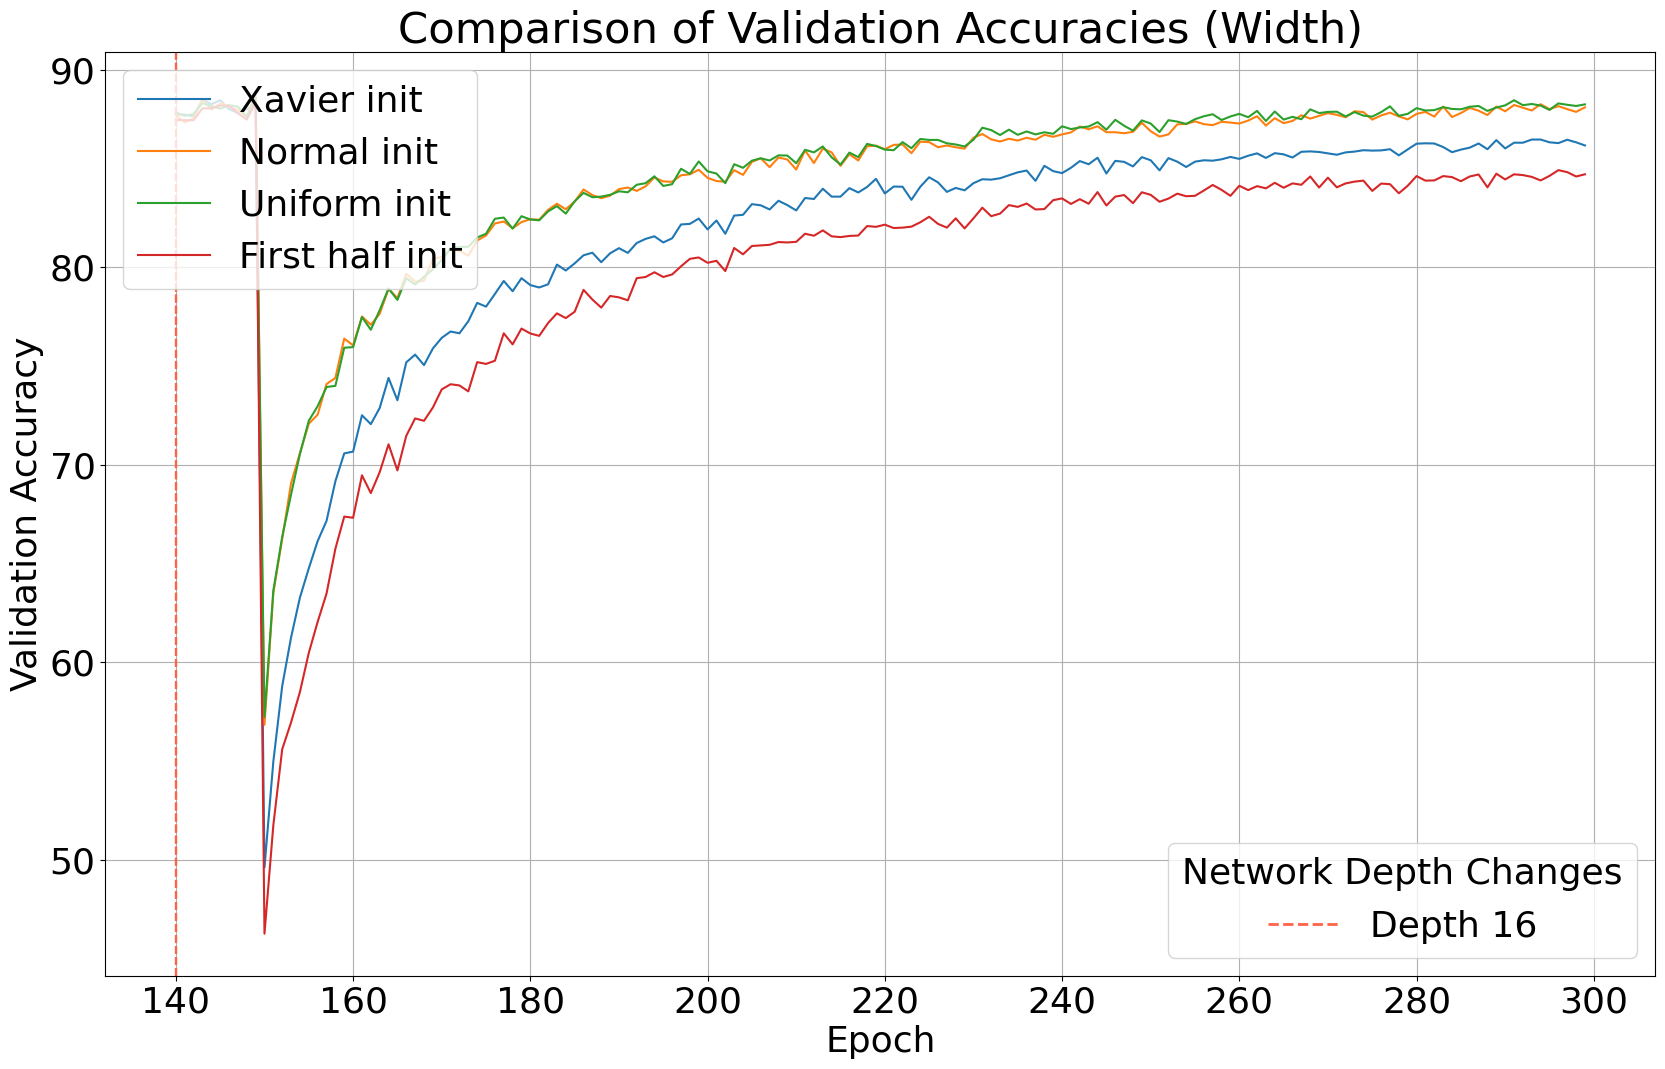

In [16]:
# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp37_CIFAR10_monet_16_width_init_0/summary.csv', 'Xavier init'),
    ('/home/sharipov/monet/output/train/Upd_Exp37_CIFAR10_monet_16_width_init_1/summary.csv', 'Normal init'),
    ('/home/sharipov/monet/output/train/Upd_Exp37_CIFAR10_monet_16_width_init_2/summary.csv', 'Uniform init'),
    ('/home/sharipov/monet/output/train/Upd_Exp37_CIFAR10_monet_16_width_init_3/summary.csv', 'First half init'),
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'Validation_Accuracy_Comparison', 'Comparison of Validation Accuracies (Width)', 140)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Used for custom legend handles

def plot_all_metrics(paths, dest, fig_name, title, start=0):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(20, 12))
    
    # Define a palette ofs pastel colors
    pastel_colors = ['#FF6347', '#4682B4', '#32CD32', '#FF69B4', '#FFA500']  # Tomato, SteelBlue, LimeGreen, HotPink, Orange
    
    # Storage for layer change legends
    layer_legend_handles = []
    processed = set()
    # Loop through each path and name, load data, and plot it
    for path, name in paths:
        data = pd.read_csv(path)
        data = data[data['epoch'] >= start]
        print(name, max(data['eval_top1']))
        ax.plot(data['epoch'], data['eval_top1'], label=name)
        
        # If the DataFrame contains the 'Active layers' column, process changes
        
        if 'Active layers' in data.columns:
            # Find unique active layer counts and assign colors
            unique_layers = data['Active layers'].unique()
            color_map = {layer: pastel_colors[i % len(pastel_colors)] for i, layer in enumerate(unique_layers)}
            
            # Generate a legend item for each unique layer count
            for layer, color in color_map.items():
                if not layer in processed:
                    print(layer)
                    print(processed)
                    processed.add(layer)
                    layer_legend_handles.append(Line2D([0], [0], color=color, lw=2, linestyle='--', label=f'Depth {layer}'))
            
            # Plot vertical lines for layer changes
            layer_changes = data[data['Active layers'].diff() != 0]
            for index, row in layer_changes.iterrows():
                ax.axvline(x=row['epoch'], color=color_map[row['Active layers']], linestyle='--')
    
    # Configure axis labels, legend, and grid
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Accuracy')
    ax.grid(True)
    
    # Set plot title
    plt.title(title)
    
    # Create the legends
    # First legend for the plots
    first_legend = ax.legend(loc='upper left')
    # Add the first legend manually to the current Axes.
    plt.gca().add_artist(first_legend)
    
    # Second legend for the depth change lines
    ax.legend(handles=layer_legend_handles, loc='lower right', title='Network Depth Changes')
    
    # Save the figure to disk
    plt.savefig(f'{dest}/{fig_name}.png', dpi=300, bbox_inches='tight')
    plt.show()


Xavier init 86.79
1
set()
2
{1}
4
{1, 2}
8
{1, 2, 4}
16
{8, 1, 2, 4}
Normal init 86.63
Uniform init 86.67
Last layer init 86.77


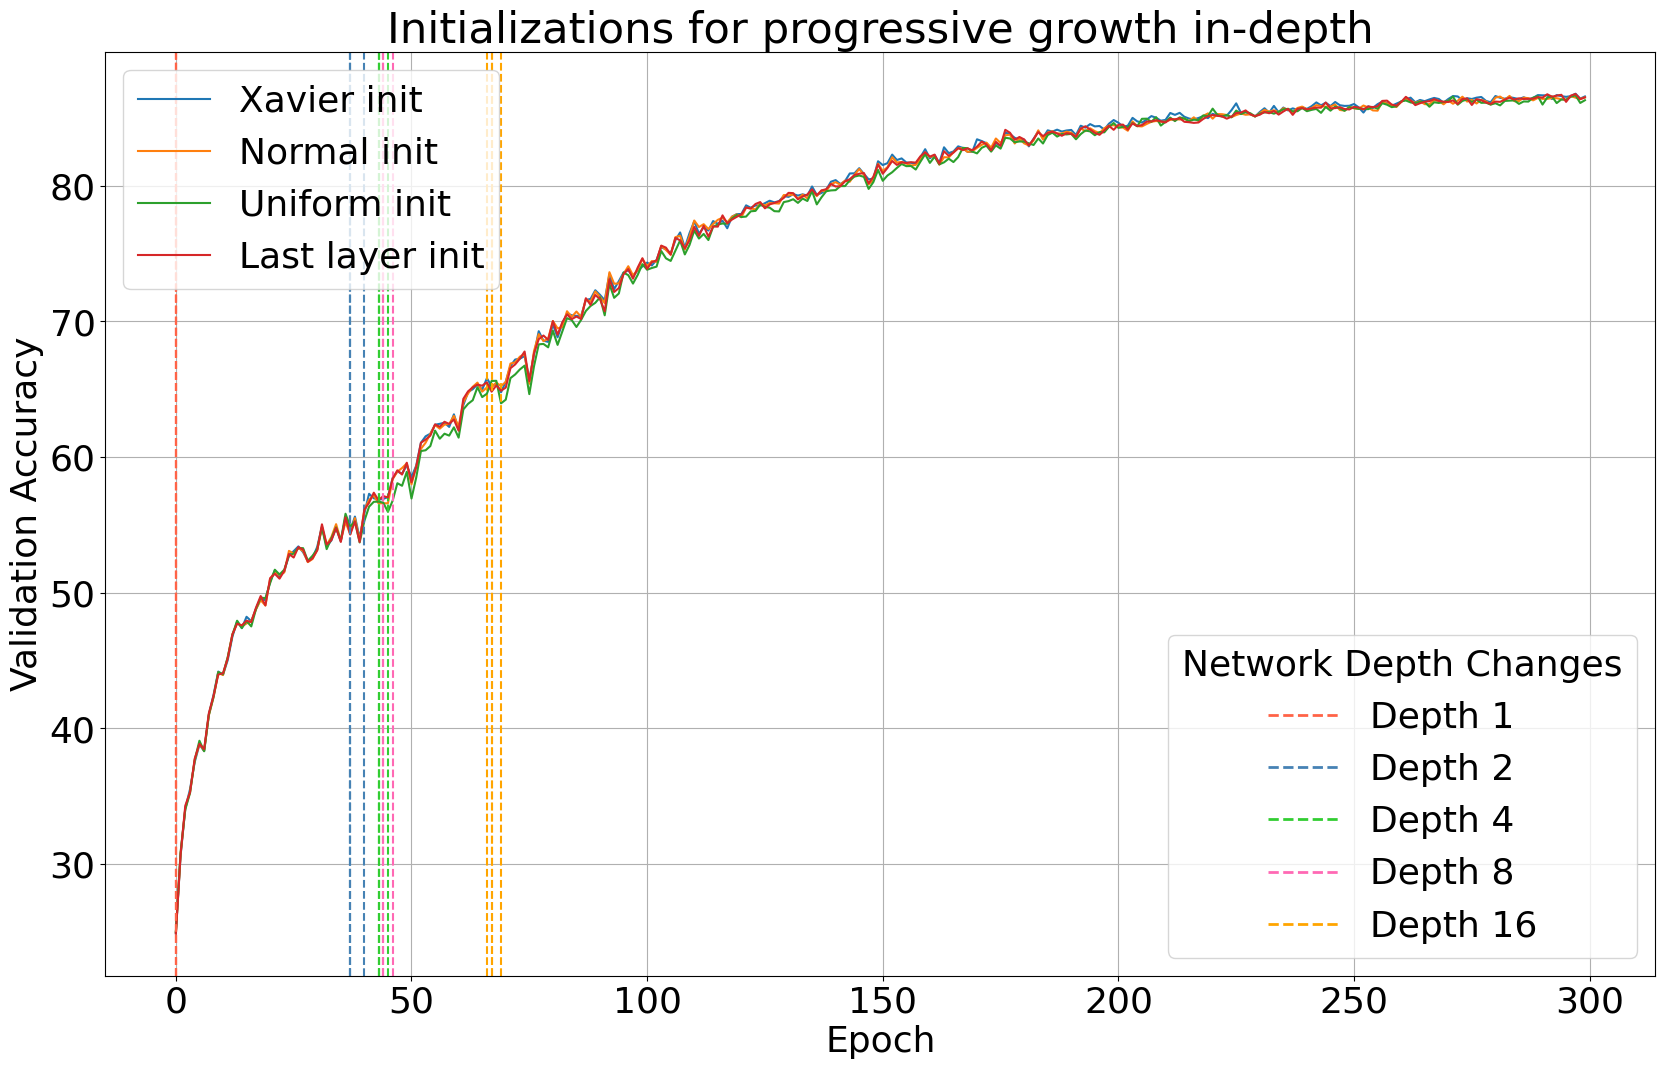

In [42]:
# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp38_CIFAR10_monet_dynamic_init_0/summary.csv', 'Xavier init'),
    ('/home/sharipov/monet/output/train/Upd_Exp38_CIFAR10_monet_dynamic_init_1/summary.csv', 'Normal init'),
    ('/home/sharipov/monet/output/train/Upd_Exp38_CIFAR10_monet_dynamic_init_2/summary.csv', 'Uniform init'),
    ('/home/sharipov/monet/output/train/Upd_Exp38_CIFAR10_monet_dynamic_init_3/summary.csv', 'Last layer init'),
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'init_prog_depth', 'Initializations for progressive growth in-depth')

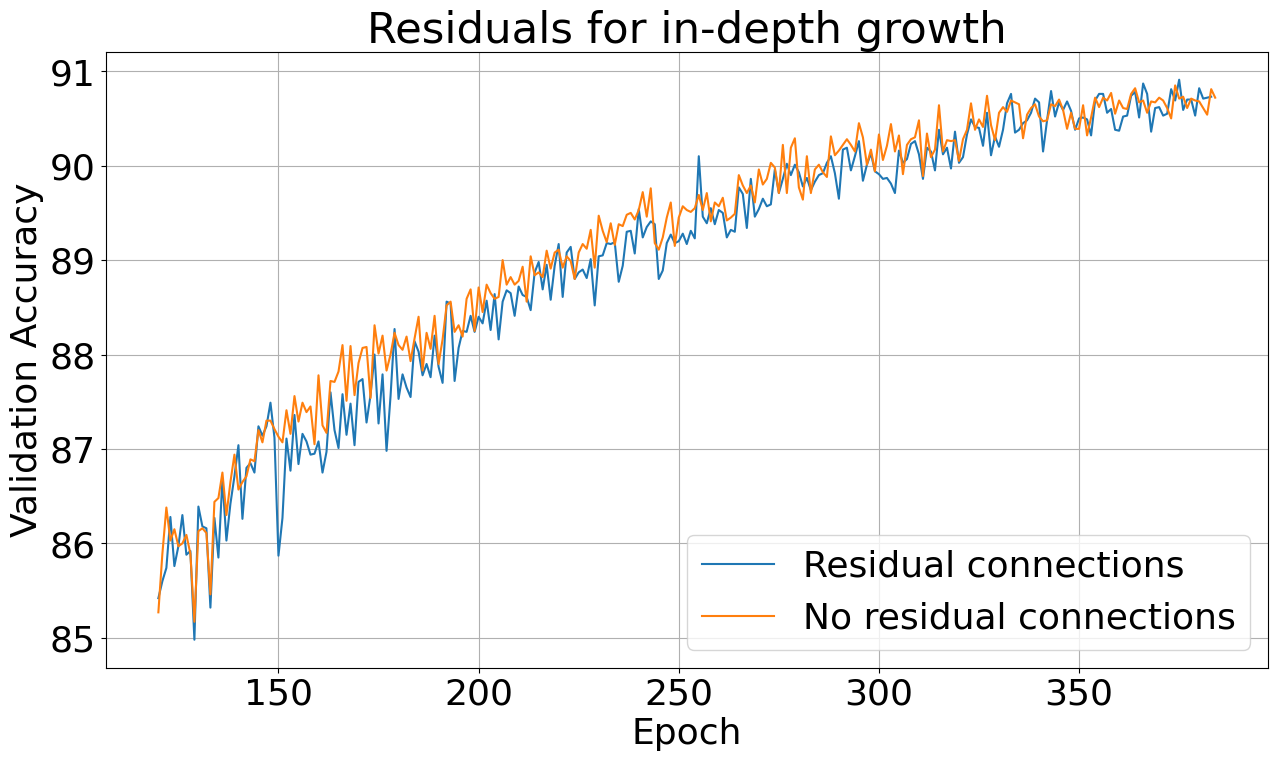

In [9]:
# Paths to the CSV files along with their descriptive names
paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_12_actual_residual/summary.csv', 'Residual connections'),
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_12_residual/summary.csv', 'No residual connections'),
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'residuals4', 'Residuals for in-depth growth', 120)

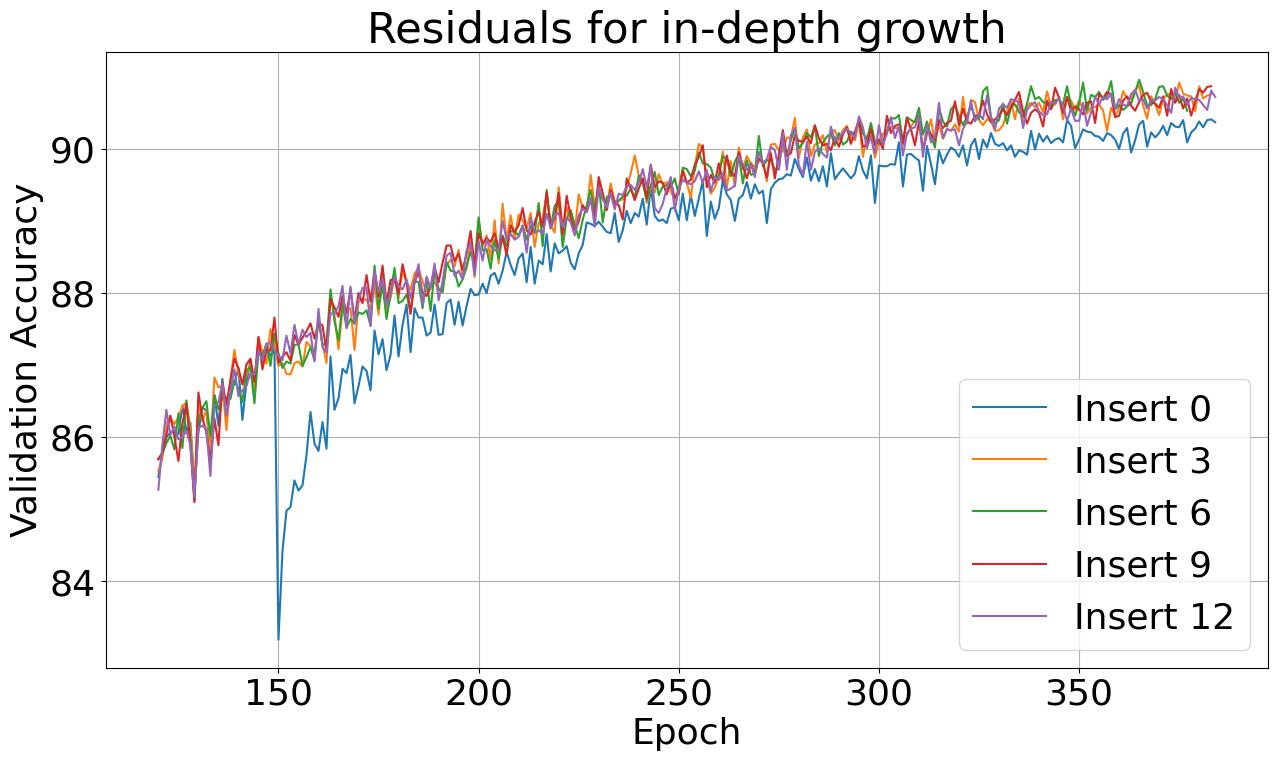

In [24]:
# Paths to the CSV files along with their descriptive names

paths = [
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_0_residual/summary.csv', 'Insert 0'),
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_3_residual/summary.csv', 'Insert 3'),
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_6_residual/summary.csv', 'Insert 6'),
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_9_residual/summary.csv', 'Insert 9'),
    ('/home/sharipov/monet/output/train/Upd_Exp47_CIFAR10_gradient_12_plus_4_insert_12_residual/summary.csv', 'Insert 12'),
]

# Call the function to plot all metrics on a single plot
plot_all_metrics(paths, '/home/sharipov/monet/output/figures', 'residuals', 'Residuals for in-depth growth', 120)

In [3]:
def calculate_complexity(layers, W=32, H=32, C=10):
    # 3 for the forward and backward pass
    complexity = 3 * layers * (16.5 * 192**2 + 77.125 * 192 ) * W * H / 16 + 19584 * H*W + 768 * C
    num_weights = layers * 359436 + 149760
    complexity_w = complexity + 2 * num_weights
    print(f"Complexity: {complexity:.2e}")
    print(f"Complexity with weight norms: {complexity_w:.2e}")

In [4]:
calculate_complexity(2100)

Complexity: 2.51e+11
Complexity with weight norms: 2.53e+11
